## Animal Subspecies : Cat Breeds

In [24]:
pip install --upgrade selenium pillow tqdm webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

breeds = ["ragdoll", "maine coon", "persian", "british shorthair", 
          "siamese", "bengal", "norwegian forest cat", 
          "munchkin", "american shorthair", "sphynx"]

base_dir = "cat_dataset"
os.makedirs(base_dir, exist_ok=True)

for breed in breeds:
    folder = os.path.join(base_dir, breed.replace(" ", "_"))
    os.makedirs(folder, exist_ok=True)

In [5]:
# ⬅️  Run this cell once
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager   # <— avoids hard-coding driver
import requests, time, os
from PIL import Image
from io import BytesIO
from tqdm import tqdm

def download_images(query, path, max_images=1000, scrolls=30):
    options = Options()
    options.add_argument("--headless=new")
    service = Service(ChromeDriverManager().install())
    driver  = webdriver.Chrome(service=service, options=options)

    driver.get(f"https://www.google.com/search?tbm=isch&q={query}")
    time.sleep(2)

    body = driver.find_element(By.TAG_NAME, "body")
    for _ in range(scrolls):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.4)

    thumbs = driver.find_elements(By.CSS_SELECTOR, "img.Q4LuWd")
    os.makedirs(path, exist_ok=True)
    downloaded = 0

    for thumb in tqdm(thumbs, total=min(max_images, len(thumbs))):
        if downloaded >= max_images:
            break
        try:
            thumb.click(); time.sleep(0.5)
            full = driver.find_element(By.CSS_SELECTOR, "img.n3VNCb")
            src  = full.get_attribute("src")
            if src and src.startswith("http"):
                r   = requests.get(src, timeout=5)
                img = Image.open(BytesIO(r.content)).convert("RGB")
                img.save(os.path.join(path, f"{query.replace(' ','_')}_{downloaded:04}.jpg"),
                         "JPEG", quality=90)
                downloaded += 1
        except Exception:
            continue
    driver.quit()


In [6]:
for breed in breeds:
    folder = os.path.join(base_dir, breed.replace(" ", "_"))
    print(f"Downloading: {breed}")
    download_images(breed + " cat", folder, max_images=1000)

Downloading: ragdoll


0it [00:00, ?it/s]


Downloading: maine coon


0it [00:00, ?it/s]


Downloading: persian


0it [00:00, ?it/s]


Downloading: british shorthair


0it [00:00, ?it/s]


Downloading: siamese


0it [00:00, ?it/s]


Downloading: bengal


0it [00:00, ?it/s]


Downloading: norwegian forest cat


0it [00:00, ?it/s]


Downloading: munchkin


0it [00:00, ?it/s]


Downloading: american shorthair


0it [00:00, ?it/s]


Downloading: sphynx


0it [00:00, ?it/s]


In [7]:
from PIL import UnidentifiedImageError

def standardize_images(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            filepath = os.path.join(root, file)
            try:
                img = Image.open(filepath)
                img = img.convert("RGB")
                img = img.resize((224, 224))
                img.save(filepath)
            except (UnidentifiedImageError, OSError):
                os.remove(filepath)

standardize_images(base_dir)

In [8]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [18]:
import splitfolders

splitfolders.ratio("cat_dataset", output="cat_dataset_split", seed=42, ratio=(0.7, 0.15, 0.15))

Copying files: 5240 files [00:35, 147.93 files/s]


In [19]:
cat_breeds = [
    "ragdoll",
    "maine coon",
    "persian cat",
    "british shorthair",
    "siamese",
    "bengal",
    "norwegian forest",
    "munchkin",
    "american shorthair",
    "sphynx"
]

base_path = "cat_dataset"

for breed in cat_breeds:
    folder_name = breed.replace(" ", "_")
    folder_path = os.path.join(base_path, folder_name)
    print(f"📥 Downloading images for: {breed}")
    download_images(breed, folder_path, max_images=1000)

📥 Downloading images for: ragdoll


0it [00:00, ?it/s]


📥 Downloading images for: maine coon


0it [00:00, ?it/s]


📥 Downloading images for: persian cat


0it [00:00, ?it/s]


📥 Downloading images for: british shorthair


0it [00:00, ?it/s]


📥 Downloading images for: siamese


0it [00:00, ?it/s]


📥 Downloading images for: bengal


0it [00:00, ?it/s]


📥 Downloading images for: norwegian forest


0it [00:00, ?it/s]


📥 Downloading images for: munchkin


0it [00:00, ?it/s]


📥 Downloading images for: american shorthair


0it [00:00, ?it/s]


📥 Downloading images for: sphynx


0it [00:00, ?it/s]


In [9]:
from PIL import Image
import os
from tqdm import tqdm

def resize_and_standardize_images(base_path, target_size=(224, 224)):
   
    for breed_folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, breed_folder)

        if not os.path.isdir(folder_path):
            continue

        print(f"Standardizing: {breed_folder}")
        for filename in tqdm(os.listdir(folder_path)):
            file_path = os.path.join(folder_path, filename)

            try:
                with Image.open(file_path) as img:
                    img = img.convert("RGB")
                    img = img.resize(target_size)
                    standardized_name = filename.split('.')[0] + ".jpg"
                    img.save(os.path.join(folder_path, standardized_name), "JPEG")
            except Exception as e:
                print(f"Failed: {file_path}")
                os.remove(file_path)

In [10]:
resize_and_standardize_images("cat_dataset", target_size=(224, 224))

Standardizing: american_shorthair


100%|██████████| 587/587 [00:03<00:00, 179.11it/s]


Standardizing: bengal


100%|██████████| 589/589 [00:04<00:00, 136.56it/s]


Standardizing: british_shorthair


100%|██████████| 587/587 [00:03<00:00, 155.49it/s]


Standardizing: maine_coon


100%|██████████| 561/561 [00:04<00:00, 128.51it/s]


Standardizing: munchkin


100%|██████████| 590/590 [00:04<00:00, 133.77it/s]


Standardizing: norwegian_forest


100%|██████████| 296/296 [00:02<00:00, 122.79it/s]


Standardizing: norwegian_forest_cat


0it [00:00, ?it/s]


Standardizing: persian


100%|██████████| 293/293 [00:02<00:00, 138.65it/s]


Standardizing: persian_cat


0it [00:00, ?it/s]


Standardizing: ragdoll


100%|██████████| 587/587 [00:03<00:00, 150.97it/s]


Standardizing: siamese


100%|██████████| 564/564 [00:04<00:00, 137.71it/s]


Standardizing: sphynx


100%|██████████| 586/586 [00:04<00:00, 135.92it/s]


In [11]:
import os
import random
import shutil

def split_dataset(base_path, output_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Ratios must sum to 1."

    # Create output directories
    for split in ['train', 'val', 'test']:
        for breed in os.listdir(base_path):
            os.makedirs(os.path.join(output_path, split, breed), exist_ok=True)

    for breed in os.listdir(base_path):
        breed_folder = os.path.join(base_path, breed)
        if not os.path.isdir(breed_folder):
            continue

        images = os.listdir(breed_folder)
        random.shuffle(images)

        total = len(images)
        train_end = int(train_ratio * total)
        val_end = train_end + int(val_ratio * total)

        splits = {
            'train': images[:train_end],
            'val': images[train_end:val_end],
            'test': images[val_end:]
        }

        for split, split_images in splits.items():
            for img_file in split_images:
                src = os.path.join(breed_folder, img_file)
                dst = os.path.join(output_path, split, breed, img_file)
                shutil.copy2(src, dst)

In [12]:
split_dataset(
    base_path="cat_dataset", 
    output_path="cat_dataset_split", 
    train_ratio=0.7, 
    val_ratio=0.15, 
    test_ratio=0.15
)

In [ ]:
import pathlib, time, json, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, applications
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix

DATA_DIR  = pathlib.Path("cat_dataset_split")
IMG_SIZE  = (224, 224)
BATCH     = 32
EPOCHS    = 50          # as required
CLASS_NAMES = sorted([p.name for p in (DATA_DIR/"train").iterdir()])
N_CLASSES = len(CLASS_NAMES)

print("Classes ➜", CLASS_NAMES)

In [ ]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [16]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
])

def build_dataset(split, shuffle=True):
    ds = tf.keras.utils.image_dataset_from_directory(
            DATA_DIR/split,
            image_size=IMG_SIZE,
            batch_size=BATCH,
            shuffle=shuffle
         )
    if split == "train":
        ds = ds.map(lambda x, y: (data_aug(x, training=True), y),
                    num_parallel_calls=tf.data.AUTOTUNE)
    return ds.cache().prefetch(tf.data.AUTOTUNE)

train_ds = build_dataset("train")
val_ds   = build_dataset("val", shuffle=False)
test_ds  = build_dataset("test", shuffle=False)


Found 5223 files belonging to 12 classes.
Found 3005 files belonging to 12 classes.
Found 3042 files belonging to 12 classes.


In [19]:
def build_model(backbone_name:str, base_trainable=False, lr=1e-4):
    backbones = {
        "resnet50"   : applications.ResNet50,
        "densenet121": applications.DenseNet121,
        "mobilenetv3": applications.MobileNetV3Large,   # v3-Large ≈ best top-1
    }
    base = backbones[backbone_name](
        include_top=False, weights="imagenet", input_shape=IMG_SIZE + (3,)
    )
    base.trainable = base_trainable   # frozen in stage-1, unfrozen for fine-tune

    inputs = layers.Input(shape=IMG_SIZE + (3,))
    x      = applications.imagenet_utils.preprocess_input(inputs)
    x      = base(x, training=False)
    x      = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(N_CLASSES, activation="softmax", dtype="float32")(x)

    model = models.Model(inputs, outputs, name=backbone_name)
    model.compile(
        optimizer=optimizers.Adam(lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [20]:
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None): self.times=[]
    def on_epoch_begin(self, epoch, logs=None): self.start=time.time()
    def on_epoch_end(self, epoch, logs=None): self.times.append(time.time()-self.start)

def train_backbone(name):
    print(f"\n🔧 Training {name}")
    # ---- stage-1: train top classifier only -------------------------------
    model      = build_model(name, base_trainable=False, lr=1e-4)
    t_hist     = TimeHistory()
    ckpt       = tf.keras.callbacks.ModelCheckpoint(f"{name}_best.keras",
                                                    save_best_only=True,
                                                    monitor="val_accuracy")
    reduce_lr  = tf.keras.callbacks.ReduceLROnPlateau(patience=4, factor=0.3)

    hist = model.fit(train_ds,
                     validation_data=val_ds,
                     epochs=EPOCHS,
                     callbacks=[t_hist, ckpt, reduce_lr],
                     verbose=2)

    # ---- stage-2: fine-tune the whole backbone ----------------------------
    model = tf.keras.models.load_model(f"{name}_best.keras")  # load best weights
    model.get_layer(index=2).trainable = True                 # unfreeze backbone
    model.compile(optimizers.Adam(1e-5),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    ft_hist = model.fit(train_ds,
                        validation_data=val_ds,
                        epochs=EPOCHS//5,
                        callbacks=[t_hist, reduce_lr],
                        verbose=2)

    # merge histories
    for k in ft_hist.history:
        hist.history[k] += ft_hist.history[k]
    total_time = sum(t_hist.times)
    model.save(f"{name}_final.keras")

    return model, hist, total_time


In [21]:
models_dict, histories, train_times = {}, {}, {}

for backbone in ["resnet50", "densenet121", "mobilenetv3"]:
    mdl, hst, tt = train_backbone(backbone)
    models_dict[backbone] = mdl
    histories[backbone]   = hst
    train_times[backbone] = tt



🔧 Training resnet50
Epoch 1/50
164/164 - 410s - 3s/step - accuracy: 0.1884 - loss: 2.3868 - val_accuracy: 0.3374 - val_loss: 2.0171 - learning_rate: 1.0000e-04
Epoch 2/50
164/164 - 392s - 2s/step - accuracy: 0.3651 - loss: 1.8876 - val_accuracy: 0.4283 - val_loss: 1.7263 - learning_rate: 1.0000e-04
Epoch 3/50
164/164 - 387s - 2s/step - accuracy: 0.4367 - loss: 1.6742 - val_accuracy: 0.4799 - val_loss: 1.5802 - learning_rate: 1.0000e-04
Epoch 4/50
164/164 - 373s - 2s/step - accuracy: 0.4748 - loss: 1.5530 - val_accuracy: 0.5082 - val_loss: 1.4912 - learning_rate: 1.0000e-04
Epoch 5/50
164/164 - 366s - 2s/step - accuracy: 0.4966 - loss: 1.4720 - val_accuracy: 0.5271 - val_loss: 1.4299 - learning_rate: 1.0000e-04
Epoch 6/50
164/164 - 363s - 2s/step - accuracy: 0.5164 - loss: 1.4120 - val_accuracy: 0.5424 - val_loss: 1.3842 - learning_rate: 1.0000e-04
Epoch 7/50
164/164 - 400s - 2s/step - accuracy: 0.5348 - loss: 1.3646 - val_accuracy: 0.5517 - val_loss: 1.3484 - learning_rate: 1.0000e-04

In [22]:
import tensorflow as tf

MODEL_NAMES = ["resnet50", "densenet121", "mobilenetv3"]   # adjust to your filenames
models_dict = {
    name: tf.keras.models.load_model(f"{name}_final.keras")   # or the path you used
    for name in MODEL_NAMES
}

print("Loaded:", list(models_dict.keys()))


Loaded: ['resnet50', 'densenet121', 'mobilenetv3']


In [23]:
def evaluate(name, model):
    y_prob = model.predict(test_ds, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)
    y_true = np.concatenate([y for _,y in test_ds], axis=0)

    acc  = accuracy_score(y_true, y_pred)
    mAP  = average_precision_score(
              tf.one_hot(y_true, N_CLASSES).numpy(),
              y_prob, average="macro")
    cm   = confusion_matrix(y_true, y_pred)
    return acc, mAP, cm

records = []
for net, mdl in models_dict.items():
    acc, mAP, cm = evaluate(net, mdl)
    records.append({
        "Model": net,
        "Accuracy": round(acc*100, 2),
        "mAP": round(mAP, 4),
        "Train_time_s": int(train_times[net]),
        "Confusion": cm.tolist()      # so it’s JSON-serialisable
    })

metrics_df = pd.DataFrame(records).sort_values("Accuracy", ascending=False)
print(metrics_df[["Model","Accuracy","mAP","Train_time_s"]])
metrics_df.to_json("metrics.json", indent=2)


C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


         Model  Accuracy     mAP  Train_time_s
0     resnet50     63.84  0.6079          3658
2  mobilenetv3     56.34  0.5237          1184
1  densenet121     28.53  0.2066          4632


C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


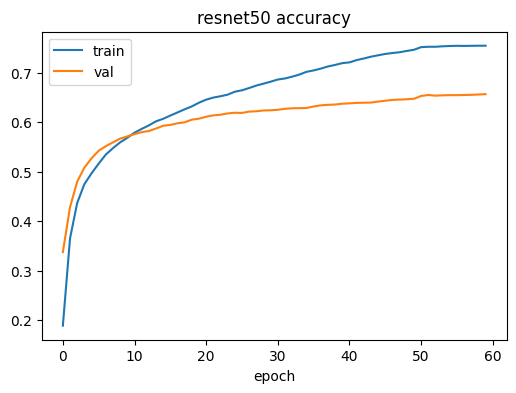

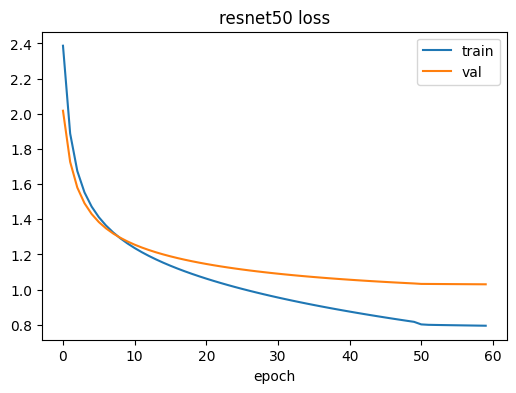

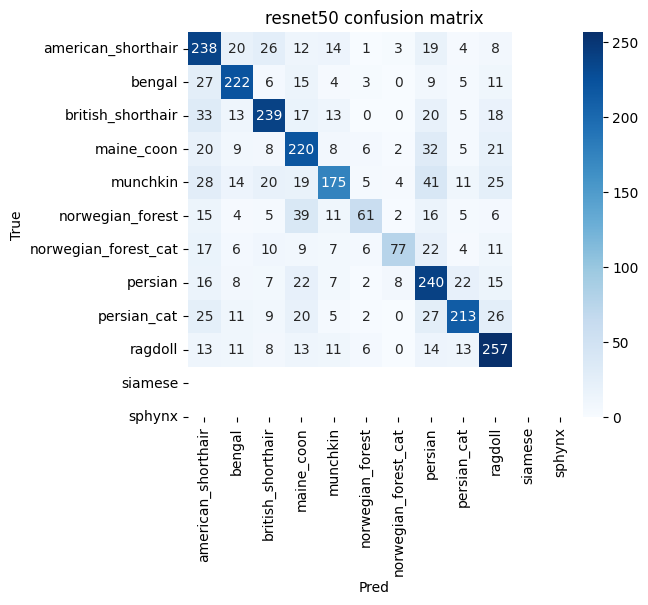

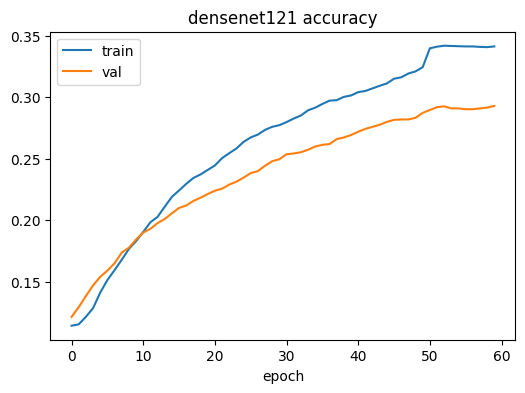

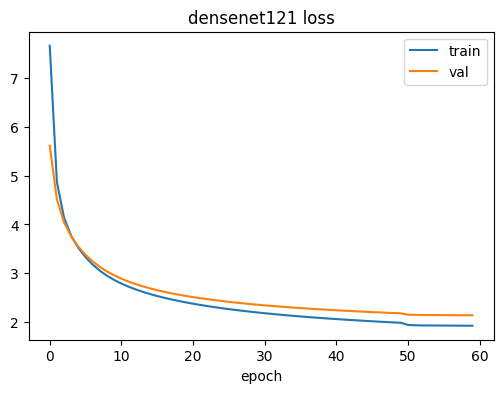

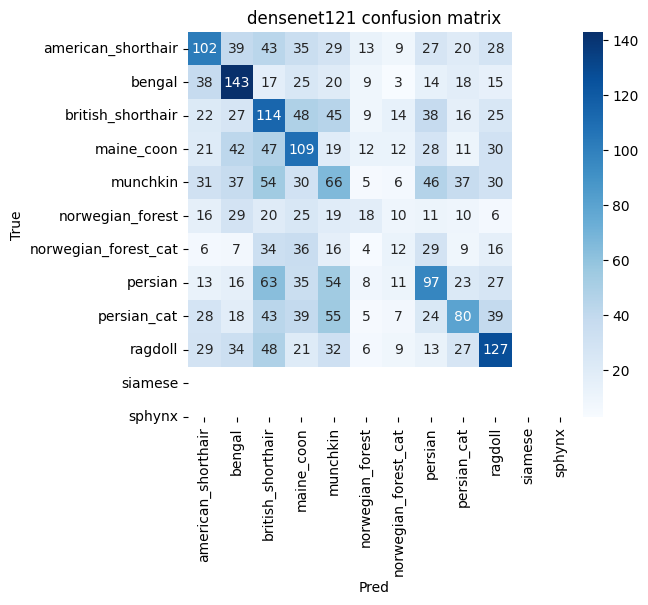

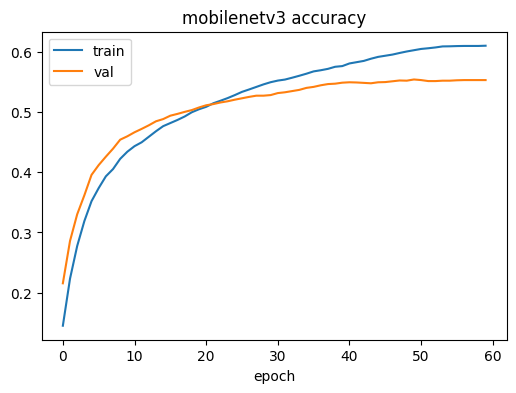

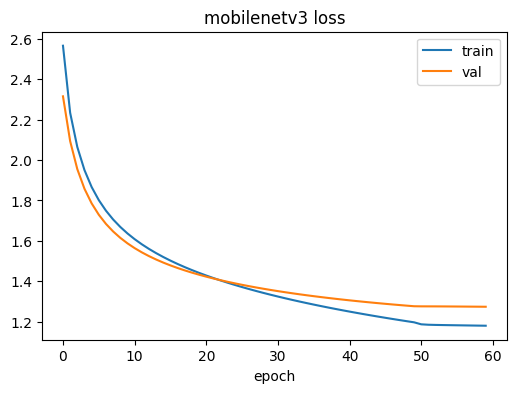

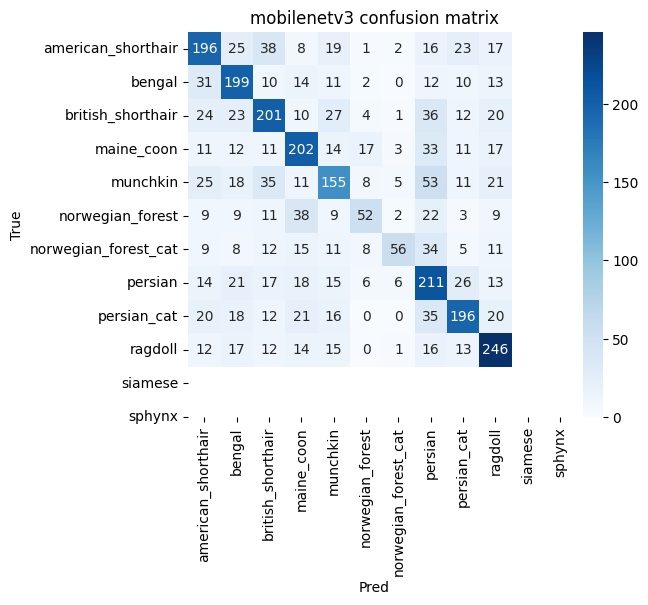

In [24]:
def plot_history(name, hist):
    plt.figure(figsize=(6,4))
    plt.plot(hist.history["accuracy"], label="train")
    plt.plot(hist.history["val_accuracy"], label="val")
    plt.title(f"{name} accuracy"); plt.xlabel("epoch"); plt.legend(); plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(hist.history["loss"], label="train")
    plt.plot(hist.history["val_loss"], label="val")
    plt.title(f"{name} loss"); plt.xlabel("epoch"); plt.legend(); plt.show()

def plot_cm(cm, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.title(title); plt.ylabel("True"); plt.xlabel("Pred"); plt.show()

for net in models_dict:
    plot_history(net, histories[net])
    plot_cm(np.array(metrics_df.loc[metrics_df.Model==net,"Confusion"].values[0]),
            f"{net} confusion matrix")


In [25]:
import pathlib, json, random, itertools, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from PIL import Image
from sklearn.manifold import TSNE
import tensorflow as tf


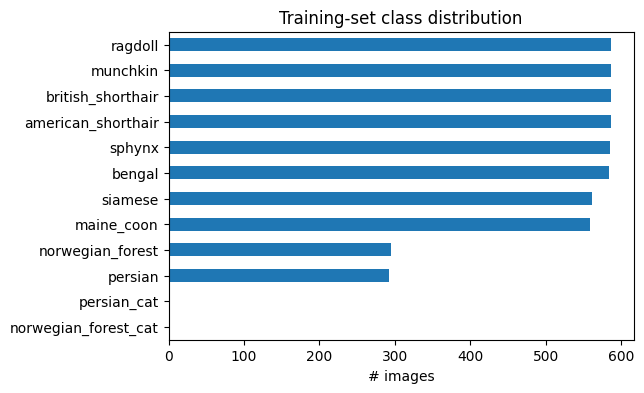

In [26]:
DATA_DIR = pathlib.Path("cat_dataset_split/train")         

class_counts = {p.name: len(list(p.glob("*.jpg"))) for p in DATA_DIR.iterdir()}
pd.Series(class_counts).sort_values().plot.barh(figsize=(6,4))
plt.title("Training-set class distribution"); plt.xlabel("# images"); plt.show()


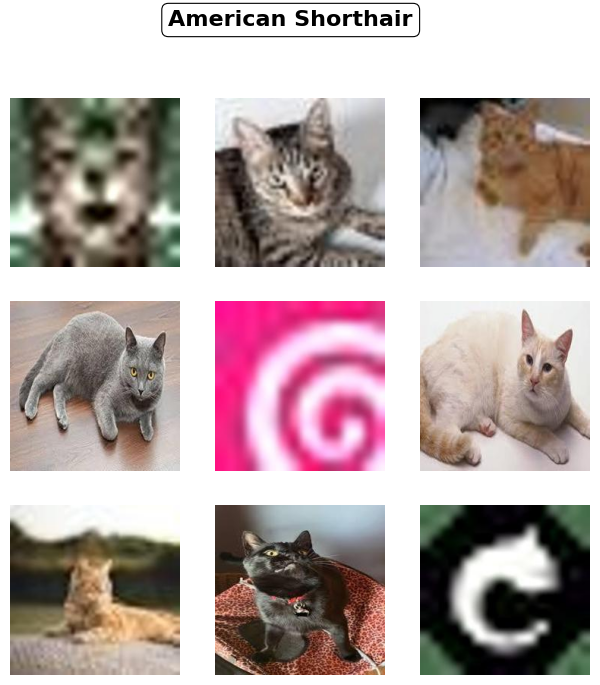

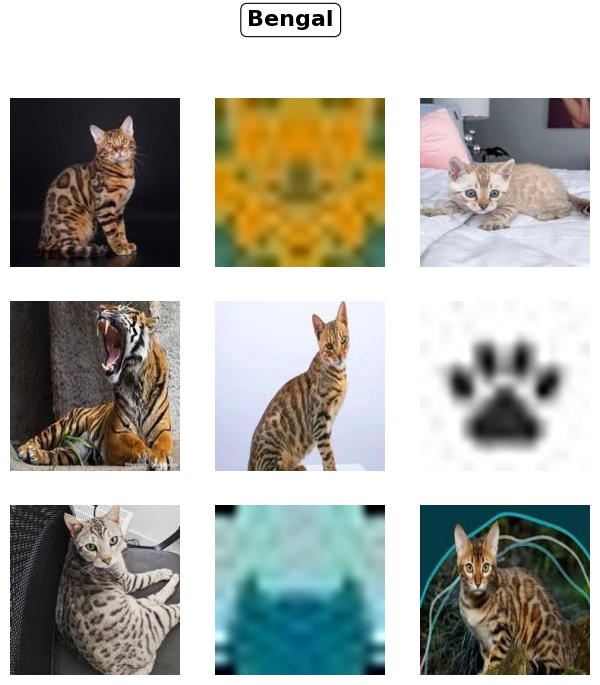

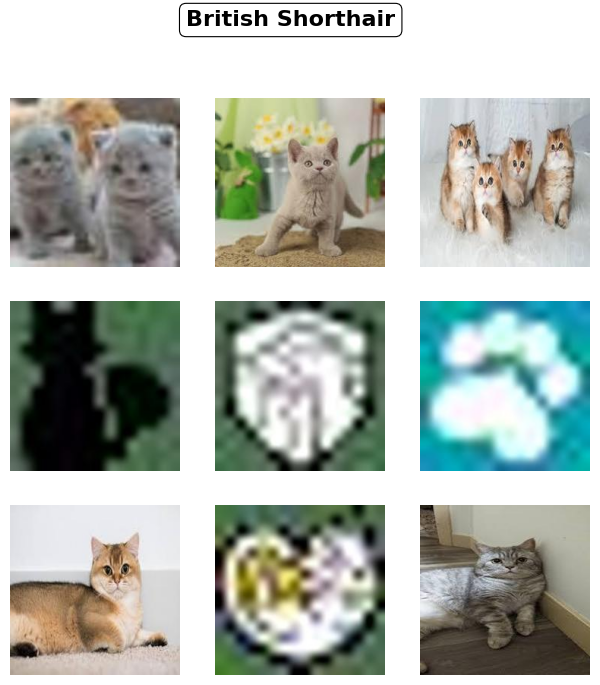

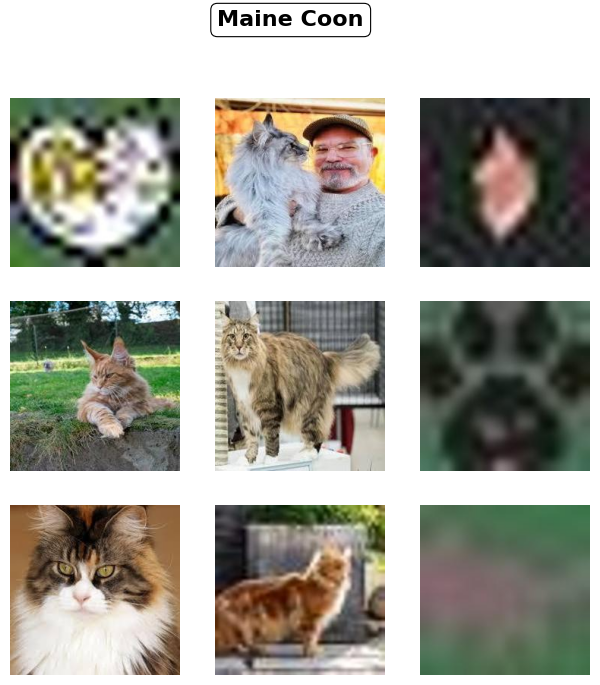

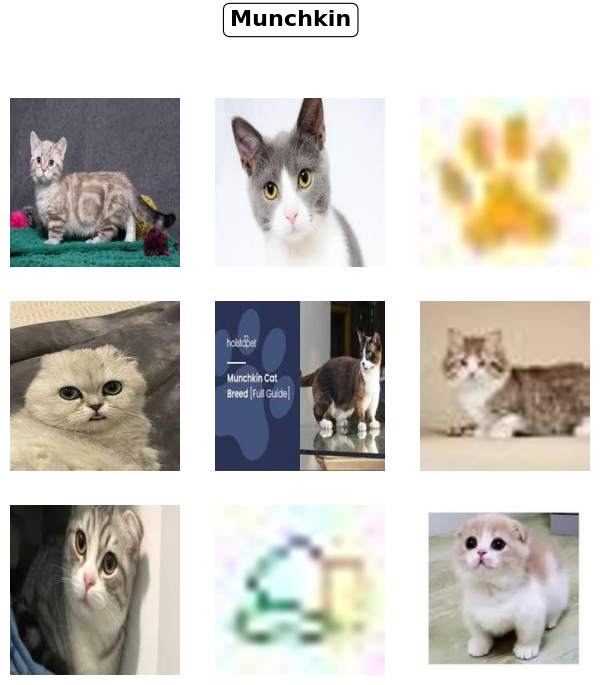

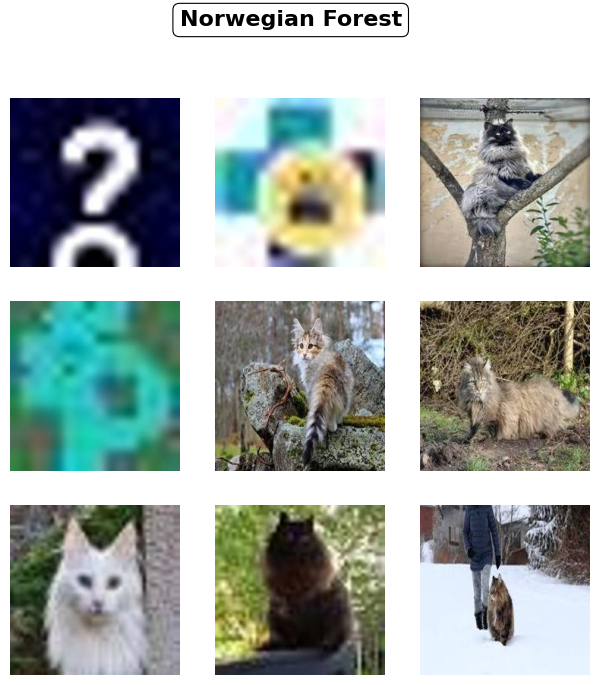

[!] Skipping 'norwegian_forest_cat' – no images found


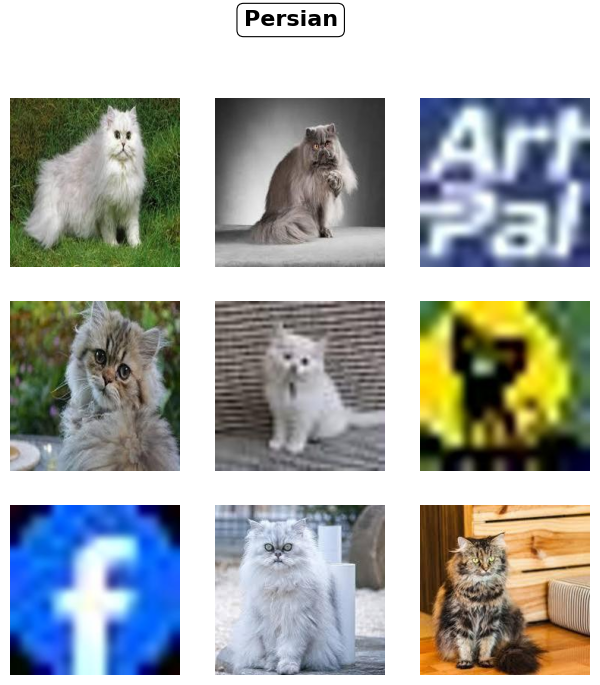

[!] Skipping 'persian_cat' – no images found


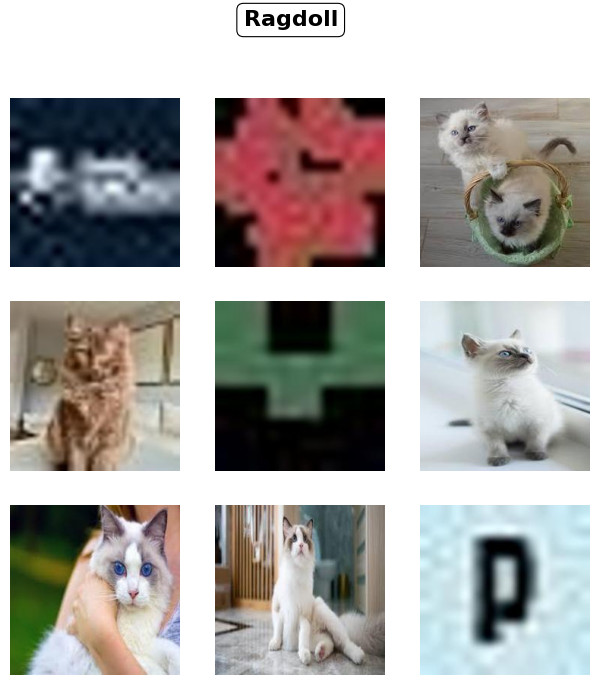

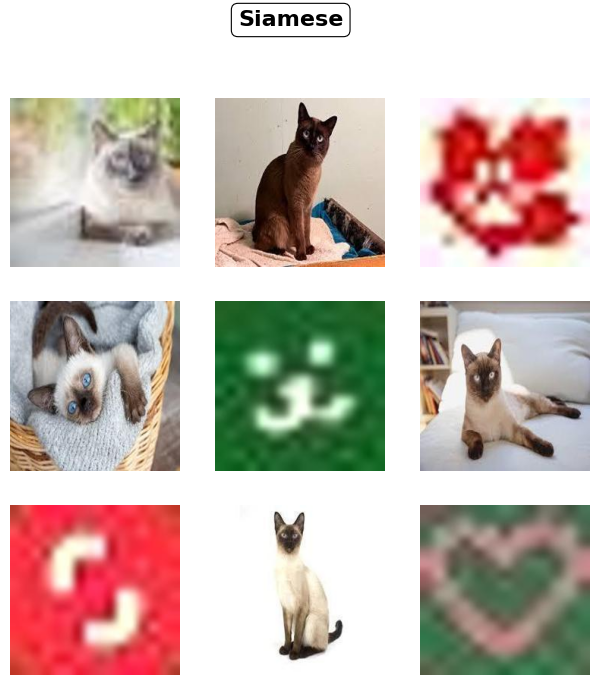

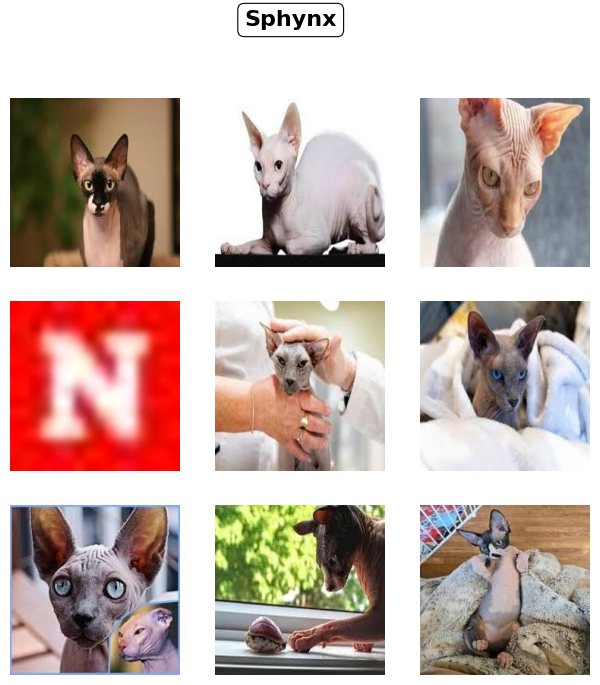

In [55]:
from pathlib import Path 

DATA_DIR          = Path("cat_dataset_split/train")   
MAX_IMGS_PER_BREED = 9                                
BREEDS_TO_SHOW     = 12                               
THUMB_SIZE_FACTOR  = 2.5                              
# ---------------------------------------------------------------------------

def plot_samples_one_breed(breed: str, n: int = MAX_IMGS_PER_BREED):
    files = list((DATA_DIR / breed).glob("*.jpg"))
    if not files:
        print(f"[!] Skipping '{breed}' – no images found"); return

    k      = min(n, len(files))
    picks  = random.sample(files, k)

    cols   = math.ceil(math.sqrt(k))
    rows   = math.ceil(k / cols)

    fig, axes = plt.subplots(rows, cols,
                             figsize=(cols * THUMB_SIZE_FACTOR,
                                      rows * THUMB_SIZE_FACTOR),
                             constrained_layout=False)          

    axes = np.array(axes).flatten()

    for ax, img_path in zip(axes, picks):
        ax.imshow(Image.open(img_path))
        ax.axis("off")

    # turn off leftover empty axes
    for ax in axes[k:]:
        ax.axis("off")

    
    fig.subplots_adjust(top=0.88)  
    fig.suptitle(
        breed.replace('_', ' ').title(),
        fontsize=16, weight='bold',
        y=0.97,                         
        va='bottom', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.8)
    )
    plt.show()



all_breeds = sorted([p.name for p in DATA_DIR.iterdir() if p.is_dir()])

for breed in all_breeds[:BREEDS_TO_SHOW]:
    plot_samples_one_breed(breed, n=MAX_IMGS_PER_BREED)

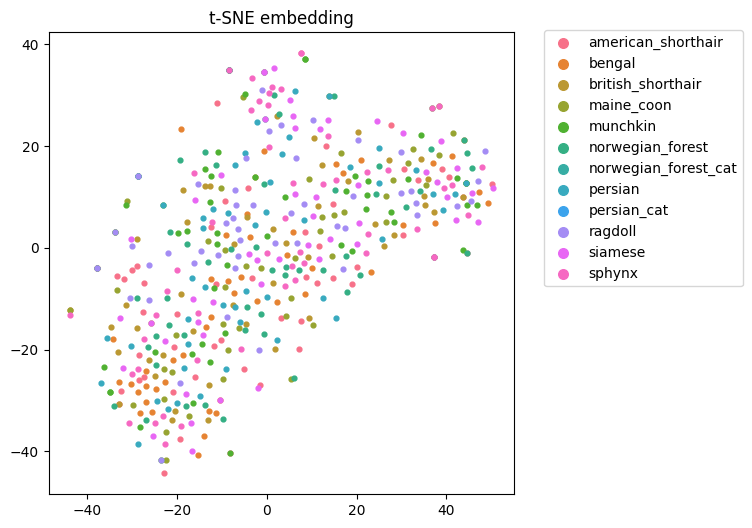

In [28]:
IMG_SIZE = (64, 64)                      
SAMPLES_PER_CLASS = 50

xs, ys, labels = [], [], []
for cls_id, cls in enumerate(class_counts):
    files = list((DATA_DIR/cls).glob("*.jpg"))[:SAMPLES_PER_CLASS]
    for f in files:
        arr = tf.keras.preprocessing.image.load_img(f, target_size=IMG_SIZE)
        arr = tf.keras.preprocessing.image.img_to_array(arr) / 255.0
        xs.append(arr.flatten()); ys.append(cls_id); labels.append(cls)

xs = np.array(xs); ys = np.array(ys)
emb = TSNE(n_components=2, random_state=42).fit_transform(xs)

plt.figure(figsize=(6,6))
palette = sns.color_palette("husl", len(class_counts))
for i, cls in enumerate(class_counts):
    pts = emb[ys==i]
    plt.scatter(pts[:,0], pts[:,1], label=cls, s=12, color=palette[i])
plt.legend(markerscale=2, bbox_to_anchor=(1.05,1.02)); plt.title("t-SNE embedding"); plt.show()


In [43]:
metrics = pd.read_json("metrics.json")          # file saved by Data Scientist
metrics[["Model","Accuracy","mAP","Train_time_s"]].style.bar(
    subset=["Accuracy","mAP"], color="#5fba7d").format({"Train_time_s":"{:.0f}"})


In [32]:
pip install streamlit pandas matplotlib seaborn


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------------------------- -------------- 6.3/9.9 MB 38.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 32.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   --------------------------------------- 731.2/731.2 kB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 6.9/6.9 MB 32.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   ------------------- -------------------- 12.6/25.8 MB 60.7 MB/s eta 0:00:01
   ---------------------------------------  25.7/25.8 MB 67.8 MB/s eta 0:00:01
   ---------------------------------------- 25.8/25.8 MB 49.6 MB/s eta 0:00:00

   ----------------------------------------  0/11 [watchdog]
   ----------------------------------------  0/11 [watchdog]
   --- ------------------------------------  1/11 

## Final Conclusion 

In [45]:
from sklearn.metrics import accuracy_score, average_precision_score
import tensorflow as tf, numpy as np

def eval_metrics(model, ds=test_ds):
    """
    Return top-1 accuracy and macro mAP on a tf.data test dataset.
    """
    y_prob = model.predict(ds, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)
    y_true = np.concatenate([y for _, y in ds], axis=0)

    acc = accuracy_score(y_true, y_pred)
    mAP = average_precision_score(
            tf.one_hot(y_true, len(CLASS_NAMES)).numpy(),
            y_prob,
            average='macro')
    return acc, mAP

In [46]:
import pandas as pd

# 1️⃣  gather raw numbers
rows = []
for name, model in models_dict.items():
    params = model.count_params()                       
    acc, mAP = eval_metrics(model)                     
    rows.append({
        "Model": name,
        "Params(M)": round(params / 1e6, 1),
        "Accuracy(%)": round(acc * 100, 2),
        "mAP": round(mAP, 4),
        "Train-time(min)": round(train_times[name] / 60, 1)
    })

df = pd.DataFrame(rows).sort_values("Accuracy(%)", ascending=False)
display(df)                                             # or print(df)

# 2️⃣  derive the “winner”
best = df.iloc[0]                                       # highest Accuracy
print("\n🏆  Recommended model:", best.Model)
print(f"    • Accuracy  : {best['Accuracy(%)']} %")
print(f"    • mAP       : {best.mAP}")
print(f"    • Params    : {best['Params(M)']} M")
print(f"    • Train time: {best['Train-time(min)']} min")

C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Anaconda\envs\ISB46703\lib\site-packages\sklearn\metrics\_ranking.py:1033: Us

Model  Params(M)  Accuracy(%)     mAP  Train-time(min)
0     resnet50       23.6        63.84  0.6079             61.0
2  mobilenetv3        3.0        56.34  0.5237             19.7
1  densenet121        7.0        28.53  0.2066             77.2


🏆  Recommended model: resnet50
    • Accuracy  : 63.84 %
    • mAP       : 0.6079
    • Params    : 23.6 M
    • Train time: 61.0 min
